In [2]:
import os
import sys
from sys import platform
from pathlib import Path

import pandas as pd
import numpy as np

# Add the parent directory to the sys.path (without this we cannot import constants or scripts)
sys.path.insert(0, str(Path.cwd().parent))
from src.plotting import plot_comparison_GER_HIC_GLO

%load_ext autoreload

In [3]:
if platform == 'darwin': # macos
    print('mac os')
    os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

mac os


In [4]:
DATA_PATH = '../data/final'
OUTPUT_PATH = '../doc/IHD_germany_2024/fig'
cvd_data_path = f'{DATA_PATH}/gbd_cardiovascularglobal.csv'
YEAR_COLUMN_NAME = 'year'
VALUE_COLUMN_NAME = 'val'

## Load Data

In [5]:
df = pd.read_csv(cvd_data_path)
df = df[df['age_name'] == 'All ages']
df.drop(columns=['measure_id', 'location_id', 'sex_id', 'sex_name', 'metric_id', 'upper', 'lower', 'age_name', 'age_id'], inplace=True)
df

,measure_name,location_name,cause_id,cause_name,metric_name,year,val
16,Deaths,Djibouti,491,Cardiovascular diseases,Rate,1990,69.240798
37,Deaths,Greece,491,Cardiovascular diseases,Rate,1990,439.652854
58,Deaths,Global,491,Cardiovascular diseases,Rate,1990,225.584376
79,Deaths,Liberia,491,Cardiovascular diseases,Rate,1990,152.243859
90,Deaths,Timor-Leste,491,Cardiovascular diseases,Rate,1990,79.809246
...,...,...,...,...,...,...,...
259360,Incidence,Saint Kitts and Nevis,491,Cardiovascular diseases,Rate,2015,696.196486
259361,Incidence,Saint Kitts and Nevis,491,Cardiovascular diseases,Rate,2016,715.347759
259362,Incidence,Saint Kitts and Nevis,491,Cardiovascular diseases,Rate,2017,735.571028
259363,Incidence,Saint Kitts and Nevis,491,Cardiovascular diseases,Rate,2018,756.091667


In [6]:
health_df = pd.read_csv(DATA_PATH + '/oecd_combined_final.csv')

In [7]:
health_df

,Country Name,Country Code,Series Name,Year,Value
0,Australia,AUS,Combined Health Indicator,1991,0.191922
1,Australia,AUS,Combined Health Indicator,1992,0.185943
2,Australia,AUS,Combined Health Indicator,1993,0.189747
3,Australia,AUS,Combined Health Indicator,1994,0.190148
4,Australia,AUS,Combined Health Indicator,1995,0.193261
...,...,...,...,...,...
1010,Romania,ROU,Combined Health Indicator,2017,0.264566
1011,Romania,ROU,Combined Health Indicator,2018,0.277408
1012,Romania,ROU,Combined Health Indicator,2019,0.288068
1013,Romania,ROU,Combined Health Indicator,2020,0.298665


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into a pandas DataFrame
data = pd.read_csv('path_to_your_data.csv')

# Normalize the population for the size of the bubbles
# You might need to adjust the factor to get appropriately sized bubbles for your plot
data['Population'] = (data['Population'] / data['Population'].max()) * 1000

# Create the bubble plot
plt.figure(figsize=(15, 10))
scatter = plt.scatter(data['GDP per capita'], 
                      data['Consumption-based emissions per capita'], 
                      s=data['Population'],  # This argument specifies the size of the bubbles
                      alpha=0.5)

# Add labels for the x and y axes
plt.xlabel('GDP per capita')
plt.ylabel('Consumption-based emissions per capita')

# Optionally add country labels
for i, row in data.iterrows():
    plt.text(row['GDP per capita'], 
             row['Consumption-based emissions per capita'], 
             row['Country'], 
             fontsize=9)

# Show the plot
plt.show()


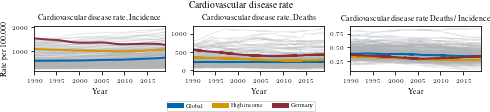

In [5]:
%autoreload 2

plot_comparison_GER_HIC_GLO(df=df, year_column=YEAR_COLUMN_NAME, value_column=VALUE_COLUMN_NAME, 
                            output_fig_path=f'{OUTPUT_PATH}/cardiovascular_disease_mortality_rate_new_legend.pdf',
                            title='Cardiovascular disease rate', country_column='location_name', indicator1='Incidence', 
                            indicator2='Deaths', indicator_column='measure_name', xlabel='Year', ylabel='Rate per 100,000')